In [10]:
import networkx as nx
from networkx.algorithms import bipartite 
print('networkx: %s' % nx.__version__)
import pandas
print('pandas: %s' % pandas.__version__)
import matplotlib.pyplot as plt

networkx: 1.11
pandas: 0.20.1


In [11]:
df = pandas.read_csv('OriginalDatasetDS.csv', sep=',', header=None, error_bad_lines=False, 
                     warn_bad_lines=True, low_memory=False)
pandas.options.display.max_columns = 22 
print(df.sample(n=10))

     0    1   2   3   4   5   6   7   8  9  10 ...  12  13  14 15 16  17  18  \
138  11  138   3   4   0   0   0   0   0  1  4 ...   2   0   0  0  0   3   0   
72    4   72   1   1   0   0   0   0   0  5  3 ...   1   2   0  4  0   0   0   
29    2   29   2   4   0   0   0   1   2  1  3 ...   1   2   3  0  0   1   0   
66    4   66   3   1   0   0   0   0   0  5  1 ...   2   3   0  4  0   0   0   
75    4   75   1   2   0   0   0   0   0  5  3 ...   1   2   0  4  0   0   0   
53    3   53   1   1   0   0   0   0   0  4  0 ...   1   2   3  0  0   0   0   
132  10  132   5   4   0   1   1   1   1  1  0 ...   0   0   0  0  4   3   2   
73    4   73   1   3   0   0   0   0   0  5  3 ...   1   2   0  4  0   0   0   
74    4   74   3   4   0   0   0   1   0  1  2 ...   0   0   0  4  0   5   0   
68    4   68   2   3   0   0   0   0   0  0  5 ...   1   2   3  4  0   0   0   

    19  20  21  22  
138  0   0   0   0  
72   0   0   0   0  
29   0   0   0   0  
66   0   0   0   0  
75   0   0   0

In [13]:
df.columns = ['Account Manager Identification Number','Customer Identification Number',
 'Innovative','Relationship Rating',
 'Visited Tech Center','ALPHA','BETA','PILOT','have they done pilot with us',
 'Improve occupancy via differentiation/positioning',
 'Increase rate/bed through add-on services','Increase 5-star rating',
 'Staff efficiency / lower cost of delivering care','Insurance costs',
 'Utilities costs','Health & Wellness Clinical Rehab',
 'Resident monitoring and saftey','Rehospitalization/ACo partnerships',
 'Care coordination across settings','Food & Nutirition', 
 'Telehealth and remote care delivery', 'Rural health and wellness', 'Pilots in Progress'] 

A = df.loc[:,'Account Manager Identification Number']
C = df.loc[:,'Innovative']
print("Account Manager Identification Number:\n")
print(A)
print("Innovative:\n")
print(C)

Account Manager Identification Number:

0       0
1       0
2       0
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10      0
11      0
12      0
13      0
14      0
15      0
16      1
17      1
18      1
19      1
20      1
21      1
22      1
23      1
24      1
25      2
26      2
27      2
28      2
29      2
       ..
130    10
131    10
132    10
133    10
134    10
135    10
136    10
137    11
138    11
139    11
140    11
141    11
142    11
143    11
144    11
145    11
146    11
147    11
148    11
149    11
150    11
151    11
152    11
153    12
154    12
155    13
156    13
157    13
158    13
159    13
Name: Account Manager Identification Number, Length: 160, dtype: int64
Innovative:

0      4
1      4
2      4
3      3
4      1
5      1
6      1
7      5
8      2
9      2
10     2
11     1
12     1
13     3
14     4
15     3
16     4
17     2
18     2
19     4
20     2
21     4
22     3
23     3
24     3
25     3
26     3
27     3
28     4
29   

In [14]:
df.describe()

,Account Manager Identification Number,Customer Identification Number,Innovative,Relationship Rating,Visited Tech Center,ALPHA,BETA,PILOT,have they done pilot with us,Increase 5-star rating,Staff efficiency / lower cost of delivering care,Insurance costs,Resident monitoring and saftey,Rehospitalization/ACo partnerships,Food & Nutirition,Telehealth and remote care delivery,Rural health and wellness,Pilots in Progress
count,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.00000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.0
mean,5.531250,79.500000,2.593750,3.293750,0.187500,0.325000,0.39375,0.543750,0.131250,1.600000,1.843750,0.825000,1.206250,0.737500,0.731250,0.262500,0.125000,0.0
std,3.776661,46.332134,1.299719,1.320362,0.391538,0.555702,0.55055,0.547687,0.421466,1.962542,1.421076,1.315366,1.887052,1.472975,1.511889,0.961442,0.641833,0.0
min,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,3.000000,39.750000,1.000000,3.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,4.000000,79.500000,3.000000,3.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
75%,9.000000,119.250000,4.000000,4.000000,0.000000,1.000000,1.00000,1.000000,0.000000,4.000000,3.000000,2.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.0
max,13.000000,159.000000,5.000000,5.000000,1.000000,2.000000,2.00000,2.000000,2.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,0.0


In [16]:
df.dtypes

Account Manager Identification Number                 int64
Customer Identification Number                        int64
Innovative                                            int64
Relationship Rating                                   int64
Visited Tech Center                                   int64
ALPHA                                                 int64
BETA                                                  int64
PILOT                                                 int64
have they done pilot with us                          int64
Improve occupancy via differentiation/positioning    object
Increase rate/bed through add-on services            object
Increase 5-star rating                                int64
Staff efficiency / lower cost of delivering care      int64
Insurance costs                                       int64
Utilities costs                                      object
Health & Wellness Clinical Rehab                     object
Resident monitoring and saftey          

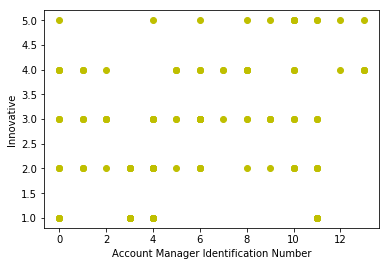

In [20]:
plt.plot(A, C,"yo")
plt.xlabel("Account Manager Identification Number")
plt.ylabel("Innovative")
plt.show()

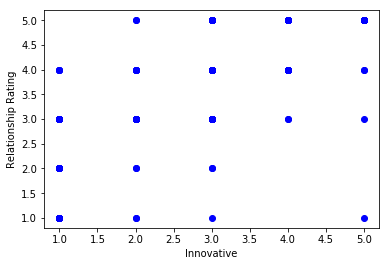

In [21]:
#C = df.loc[:,'Innovative']
D = df.loc[:,'Relationship Rating']
plt.plot(C, D,"bo")
plt.xlabel("Innovative")
plt.ylabel("Relationship Rating")
plt.show()